In [1]:
!pip install yfinance


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


# **1. Modelling Bitcoin Adj Close Using Moving Average (MA(1))**

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


In [3]:
stock_symbol = 'BTC-USD'

In [4]:
data = yf.download(tickers = stock_symbol,period ='5y',interval ='1d')

[*********************100%***********************]  1 of 1 completed


In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-20,11231.799805,11958.500000,11231.799805,11403.700195,11403.700195,9926540288
2018-02-21,11372.200195,11418.500000,10479.099609,10690.400391,10690.400391,9405339648
2018-02-22,10660.400391,11039.099609,9939.089844,10005.000000,10005.000000,8040079872
2018-02-23,9937.070312,10487.299805,9734.559570,10301.099609,10301.099609,7739500032
2018-02-24,10287.700195,10597.200195,9546.969727,9813.070312,9813.070312,6917929984


In [7]:
adj_close = data[['Adj Close']]

In [8]:
len(adj_close)

1823

<AxesSubplot:xlabel='Date'>

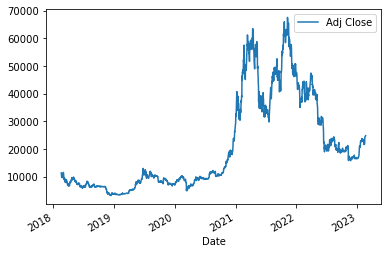

In [10]:
adj_close.plot()

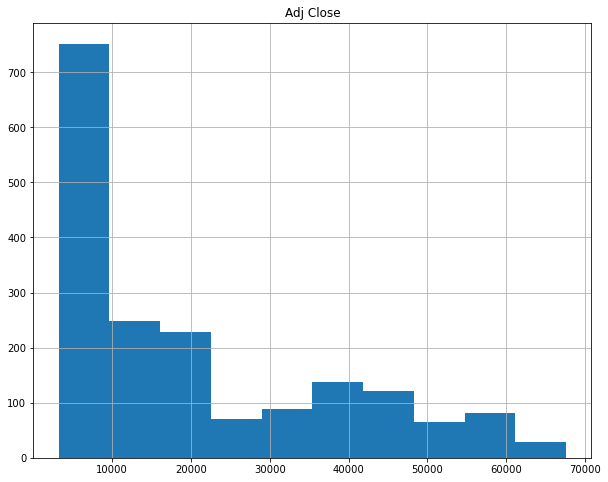

In [11]:
adj_close.hist(figsize=(10,8));

In [12]:
adj_close.columns

Index(['Adj Close'], dtype='object')

In [13]:
#add date column
adj_close["Date"] = adj_close.index


/tmp/ipykernel_10704/2819247846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_close["Date"] = adj_close.index


In [14]:
adj_close.columns

Index(['Adj Close', 'Date'], dtype='object')

In [15]:
#Lets try see if we have monthly seasonality in our data
#create the pivot table
pivot_table = adj_close.pivot_table(index=adj_close['Date'].dt.month, columns=adj_close['Date'].dt.year, values='Adj Close')
# display the pivot table
pivot_table

Date,2018,2019,2020,2021,2022,2023
Date,,,,,,
1,NaN,3701.554963,8389.270476,34761.649950,41114.422379,20250.717490
2,10374.244575,3711.907261,9630.722185,46306.798968,40763.474051,22887.259644
3,9040.557097,3976.069100,6871.016113,54998.008695,41966.237525,NaN
4,8033.596631,5178.469434,7224.477327,57206.720052,41435.319661,NaN
5,8450.997732,7309.694131,9263.151745,46443.286668,31706.105217,NaN
6,6793.507666,9415.900179,9489.227214,35845.154687,24383.685482,NaN
7,7146.349987,10669.336158,9589.899729,34444.973790,21539.253843,NaN
8,6700.129946,10643.248362,11652.394185,45709.022681,22366.266318,NaN
9,6610.675033,9814.067871,10660.276855,45939.771484,19804.779232,NaN


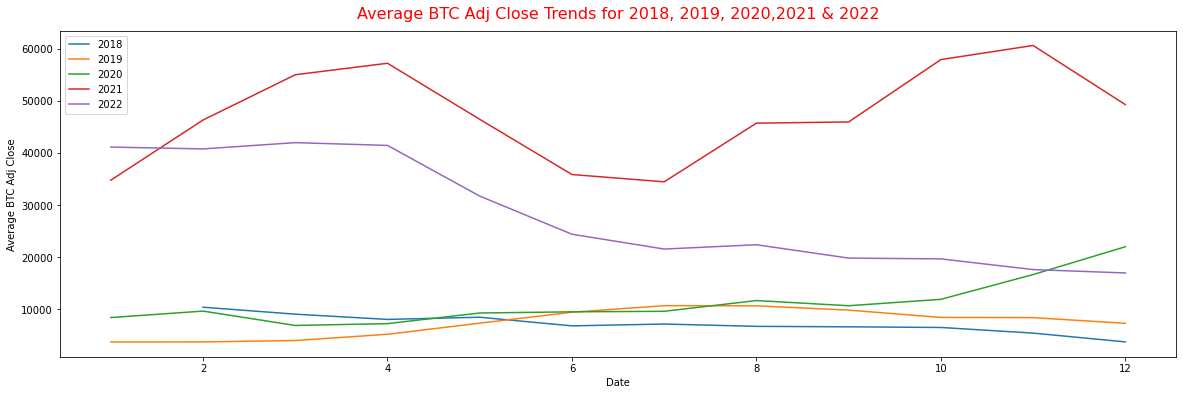

In [16]:
# plot the average BTC Adj Close
fig, ax = plt.subplots(figsize=(20, 6))
sns.set_palette("bright")
sns.lineplot(x=pivot_table.index, y=pivot_table[2018], ax=ax, label='2018')
sns.lineplot( x=pivot_table.index, y=pivot_table[2019], ax=ax, label='2019')
sns.lineplot( x=pivot_table.index, y=pivot_table[2020], ax=ax, label='2020')
sns.lineplot( x=pivot_table.index, y=pivot_table[2021], ax=ax, label='2021')
sns.lineplot( x=pivot_table.index, y=pivot_table[2022], ax=ax, label='2022')

plt.ylabel('Average BTC Adj Close')
plt.title('Average BTC Adj Close Trends for 2018, 2019, 2020,2021 & 2022', fontdict ={'fontsize':16,
                                                                   'color':'red',
                                                                   'horizontalalignment': 'center'},
                                                                   pad=12)
# Add a legend
plt.legend()
plt.show()

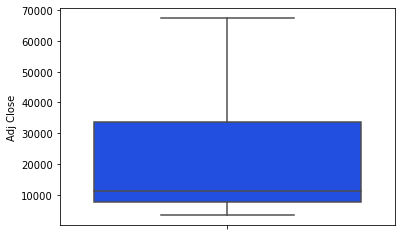

In [17]:
#checking Outliers
sns.boxplot( y=adj_close["Adj Close"] );
plt.show()

In [18]:
adj_close['Adj Close'].skew()

0.9967200574666684

In [19]:
adj_close['Adj Close'].kurtosis()


-0.31446407087191064

## Perform Root test(Ad fuller)

In [20]:
X = adj_close['Adj Close']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.422068
p-value: 0.571652
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


## Detrending Using Varriable with Linear Regression

In [21]:
# Detrend
timeTrend = np.linspace(1, len(adj_close['Adj Close']), len(adj_close['Adj Close']))
timeTrend = sm.add_constant(timeTrend)

# Fit OLS
model = sm.OLS(adj_close['Adj Close'], timeTrend)
fit_g = model.fit()
fit_g.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     1241.
Date:                Mon, 20 Feb 2023   Prob (F-statistic):          1.04e-207
Time:                        22:12:28   Log-Likelihood:                -19863.
No. Observations:                1823   AIC:                         3.973e+04
Df Residuals:                    1821   BIC:                         3.974e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1923.2820    612.211      3.142      0.002     722.572    3123.992
x1            20.4795      0.581     35.223      0.000      19.339      21.620
==============================================================================
Omnibus:                      184.416   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.313
Skew:                           0.876   Prob(JB):                     3.98e-53
Kurtosis:                       3.325   Cond. No.                     2.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

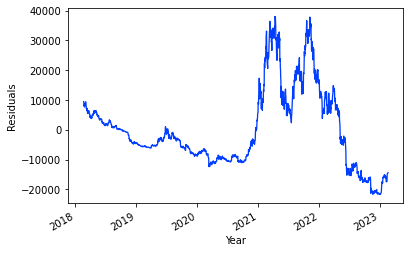

In [22]:
# Plot residuals
btc_res = fit_g.resid
btc_res.plot(linewidth=1.3, xlabel="Year", ylabel="Residuals")
plt.show()

## Detrending using First Difference

In [23]:
## Detrending using First Difference

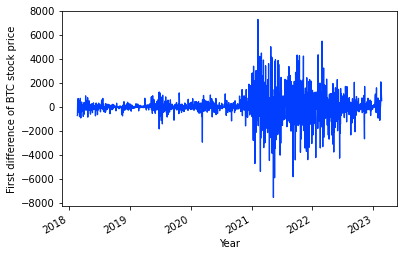

In [24]:
# Plot First Difference of BTC Stock Price
btc_res.diff().plot(
    linewidth=1.3, xlabel="Year", ylabel="First difference of BTC stock price"
)
plt.show()

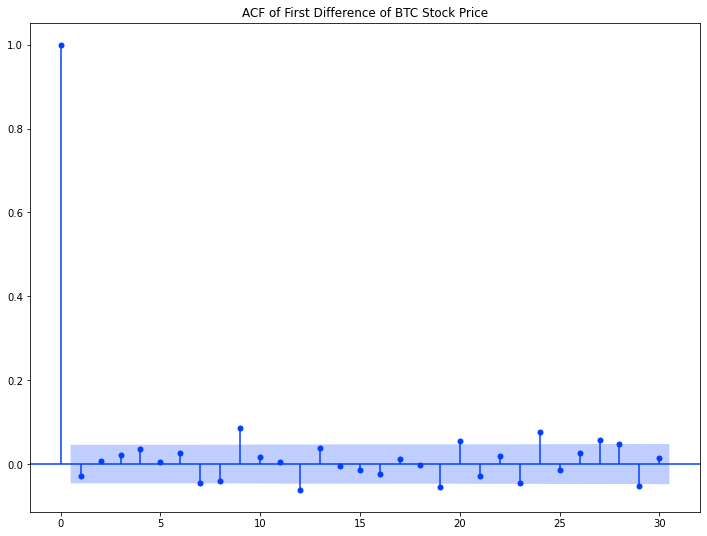

In [25]:
# ACF of First Difference of BTC Stock Price
# (Note: [1:] as we need to skip first element since the model lost one data point)
fig, ax = plt.subplots(figsize=(12, 9))
sm.graphics.tsa.plot_acf(
    adj_close['Adj Close'].diff()[1:],
    title="ACF of First Difference of BTC Stock Price",
    lags=30,
    ax=ax,
)
plt.show()

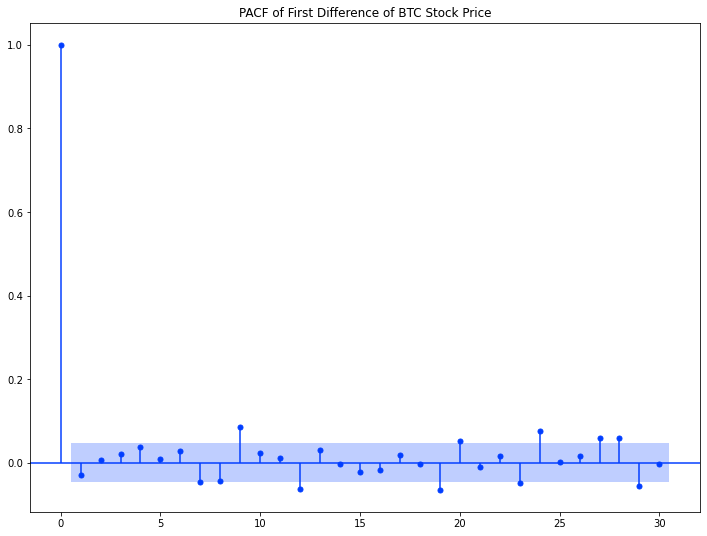

In [26]:
# PACF of First Difference of BTC Stock Price
# (Note: [1:] as we need to skip first element since the model lost one data point)
fig, ax = plt.subplots(figsize=(12, 9))
sm.graphics.tsa.plot_pacf(
    adj_close['Adj Close'].diff()[1:],
    title="PACF of First Difference of BTC Stock Price",
    lags=30,
    ax=ax,
)
plt.show()

In [27]:
# MA(1) for BTC stock
btc_ma1 = statsmodels.tsa.arima.model.ARIMA(adj_close['Adj Close'], order=(0, 0, 1)).fit()
print(btc_ma1.params)

/home/leapfrog/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/leapfrog/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/leapfrog/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


const     2.060019e+04
ma.L1     9.580504e-01
sigma2    7.797238e+07
dtype: float64


In [28]:
!pip install yfinance
!pip install arch


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.0/908.0 kB 16.5 kB/s eta 0:00:00m eta 0:00:010:03:04

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


# Forcasting Volatility of ETH-USD using GARCH(1,1)



In [29]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels
import statsmodels.api as sm
from arch import arch_model

In [30]:
eth = yf.Ticker("ETH-USD").history(period="max")
eth

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984,0,0
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984,0,0
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992,0,0
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936,0,0
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984,0,0
...,...,...,...,...,...,...,...
2023-02-12,1539.776001,1545.554199,1501.462036,1515.033691,5319698775,0,0
2023-02-13,1514.916992,1524.731445,1470.023926,1507.165894,9363855114,0,0
2023-02-14,1506.992065,1562.034302,1497.194458,1556.875122,9249575045,0,0


     lb_stat  lb_pvalue
5  12.487251   0.028688
p value < 0.05, null hypothesis rejected -> the return series has serial correlation


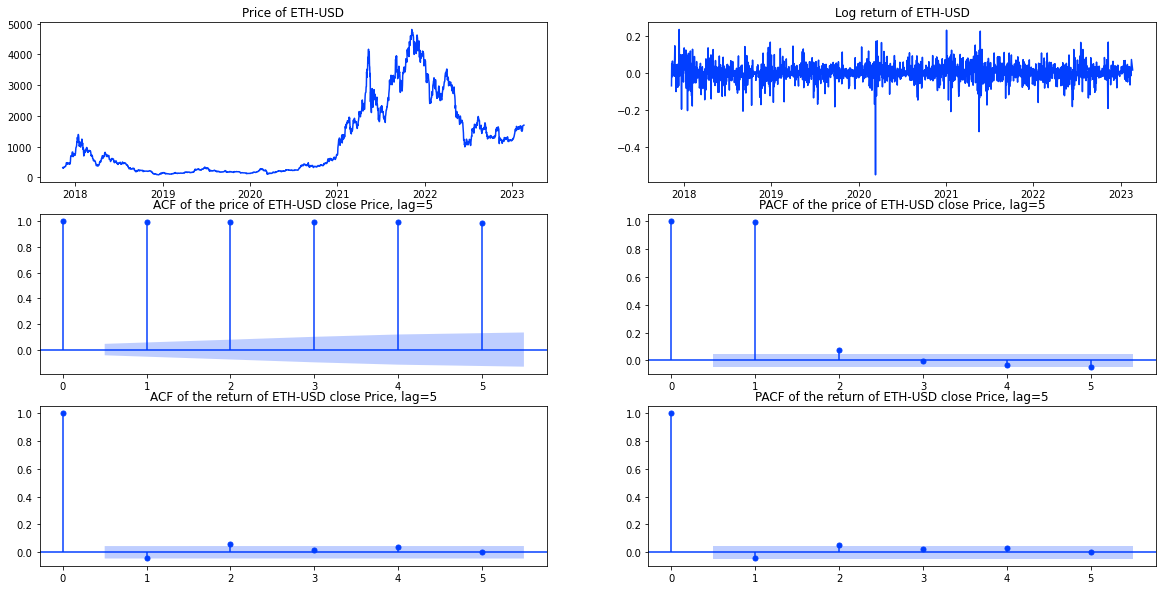

In [31]:
def to_return(px):
  return np.log(px/px.shift(1)).dropna()

def explore_the_data(px_series):
  """
    Plot the following graphs
    - px series
    - log return series
    - ACF of return
    - PACF of return
    - run the Ljung-Box Test
  """

  fig = plt.figure(figsize=(20, 10))

  grid = fig.add_gridspec(3,2)
  px_plot = fig.add_subplot(grid[0, 0])
  rtn_plot = fig.add_subplot(grid[0, 1])
  px_acf_plot = fig.add_subplot(grid[1, 0])
  px_pacf_plot = fig.add_subplot(grid[1, 1])
  rtn_acf_plot = fig.add_subplot(grid[2, 0])
  rtn_pacf_plot = fig.add_subplot(grid[2, 1])


  px_plot.plot(px_series)
  px_plot.set(title="Price of ETH-USD")

  rtn = to_return(px_series)

  rtn_plot.plot(rtn)
  rtn_plot.set(title="Log return of ETH-USD")

  lag = 5 # 7 days

  sm.graphics.tsa.plot_acf(
      px_series,
      title=f"ACF of the price of ETH-USD close Price, lag={lag}",
      lags=lag,
      ax=px_acf_plot,
  )

  sm.graphics.tsa.plot_pacf(
      px_series,
      title=f"PACF of the price of ETH-USD close Price, lag={lag}",
      lags=lag,
      ax=px_pacf_plot,
  )


  sm.graphics.tsa.plot_acf(
      rtn,
      title=f"ACF of the return of ETH-USD close Price, lag={lag}",
      lags=lag,
      ax=rtn_acf_plot,
  )

  sm.graphics.tsa.plot_pacf(
      rtn,
      title=f"PACF of the return of ETH-USD close Price, lag={lag}",
      lags=lag,
      ax=rtn_pacf_plot,
  )

  result = sm.stats.acorr_ljungbox(rtn, lags=[lag], return_df=True)
  plt.savefig('exploration.png')
  print(result)

  significant_level = 0.05
  if(result["lb_pvalue"].item() < 0.05):
    print(f"p value < {significant_level}, null hypothesis rejected -> the return series has serial correlation")
  else:
    print(f"p value > {significant_level}, null hypothesis accepted -> No serial correlation in the return series")

explore_the_data(eth["Close"])

In [32]:
# use GARCH(1, 1) to predict the time series, train: 2017-11-24 - 2021-12-31, test: 2022-01-01 - 2022-12-31
train_sdate = pd.to_datetime("2017-11-24 00:00:00", utc=True)
train_edate = pd.to_datetime("2021-12-31 23:59:59", utc=True)
test_sdate = pd.to_datetime("2022-01-01 00:00:00", utc=True)
test_edate = pd.to_datetime("2022-12-31 23:59:59", utc=True)

eth["close_px_rtn"] = to_return(eth["Close"])
eth = eth.dropna()

train = eth.loc[train_sdate:train_edate]
test = eth.loc[test_sdate:test_edate]

p = 1
q = 1
model = arch_model(train["close_px_rtn"] * 10, p = p, q = q, mean = 'AR', vol = 'GARCH', dist = 'StudentsT') # multiplier the return by 10 to disable the warning
model_fit = model.fit()
model_fit.summary()

/tmp/ipykernel_10704/3152229339.py:10: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  train = eth.loc[train_sdate:train_edate]
/tmp/ipykernel_10704/3152229339.py:11: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  test = eth.loc[test_sdate:test_edate]


Iteration:      1,   Func. Count:      7,   Neg. LLF: 40424.33988240923
Iteration:      2,   Func. Count:     17,   Neg. LLF: 20694.041073260792
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2609.3200336704294
Iteration:      4,   Func. Count:     33,   Neg. LLF: 2052.348189011106
Iteration:      5,   Func. Count:     40,   Neg. LLF: 1637.2660188197865
Iteration:      6,   Func. Count:     47,   Neg. LLF: 969.0681118556122
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1972.7996186213659
Iteration:      8,   Func. Count:     60,   Neg. LLF: 1082.101173476819
Iteration:      9,   Func. Count:     69,   Neg. LLF: 998.1396802609564
Iteration:     10,   Func. Count:     77,   Neg. LLF: 966.850191516452
Iteration:     11,   Func. Count:     83,   Neg. LLF: 966.7999043753133
Iteration:     12,   Func. Count:     89,   Neg. LLF: 966.789965351714
Iteration:     13,   Func. Count:     95,   Neg. LLF: 966.7852687699503
Iteration:     14,   Func. Count:    101,   Neg. LLF: 966.7852

<class 'statsmodels.iolib.summary.Summary'>
"""
                              AR - GARCH Model Results                              
====================================================================================
Dep. Variable:                 close_px_rtn   R-squared:                       0.000
Mean Model:                              AR   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -966.785
Distribution:      Standardized Student's t   AIC:                           1943.57
Method:                  Maximum Likelihood   BIC:                           1970.13
                                              No. Observations:                 1499
Date:                      Mon, Feb 20 2023   Df Residuals:                     1498
Time:                              22:14:25   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const          0.0172  9.591e-03      1.790  7.344e-02 [-1.629e-03,3.597e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0160  6.862e-03      2.333  1.965e-02 [2.560e-03,2.946e-02]
alpha[1]       0.1256  3.646e-02      3.443  5.748e-04   [5.409e-02,  0.197]
beta[1]        0.8449  4.078e-02     20.716  2.475e-95     [  0.765,  0.925]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             3.3346      0.314     10.604  2.861e-26 [  2.718,  3.951]
========================================================================

Covariance estimator: robust
"""

In [33]:
# predict the volatility and compare to the test set
horizon = len(test)
print(f"prediction horizion: {horizon}")

pred = model_fit.forecast(reindex=False, horizon=horizon, method="simulation")
test['pred_close_px_rtn_vol'] = np.sqrt(pred.variance.values[0])

prediction horizion: 365


/tmp/ipykernel_10704/3586869402.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_close_px_rtn_vol'] = np.sqrt(pred.variance.values[0])


In [34]:
test['close_px_rtn']

Date
2022-01-01    0.023367
2022-01-02    0.015757
2022-01-03   -0.017965
2022-01-04    0.008650
2022-01-05   -0.066379
                ...   
2022-12-27   -0.011626
2022-12-28   -0.018983
2022-12-29    0.009709
2022-12-30   -0.001968
2022-12-31   -0.002055
Name: close_px_rtn, Length: 365, dtype: float64

In [35]:
test['pred_close_px_rtn_vol']

Date
2022-01-01    0.426581
2022-01-02    0.437340
2022-01-03    0.449389
2022-01-04    0.455887
2022-01-05    0.484934
                ...   
2022-12-27    0.664753
2022-12-28    0.661179
2022-12-29    0.657602
2022-12-30    0.668631
2022-12-31    0.659276
Name: pred_close_px_rtn_vol, Length: 365, dtype: float64

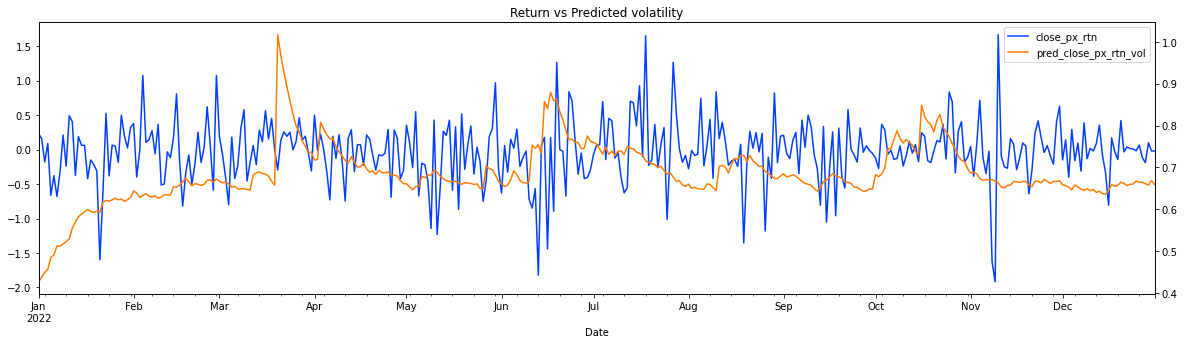

In [36]:
df = pd.DataFrame()
df['close_px_rtn'] = test['close_px_rtn'].apply(lambda x: x * 10)
df['pred_close_px_rtn_vol'] = test['pred_close_px_rtn_vol']
df.plot(secondary_y=['pred_close_px_rtn_vol'], mark_right=False, figsize = (20,5), title="Return vs Predicted volatility").get_figure().savefig('rtn_vol.png')